In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
path = 'Imagens/test/'

In [2]:
def get_img(number):
    img = cv2.imread(f'{path}test_{number}.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

bottles = []
for i in range(1,65):
  bottles.append(get_img(i))

In [3]:
dic = { 'CONTENT_HIGH':0, 'CONTENT_LOW': 0, 'COVER_NONE': 0, 'BOTTLE_SMASHED': 0, 'LABEL_WHITE': 0, 'LABEL_MISPLACED': 0, 'LABEL_NONE': 0, 'BOTTLE_NONE': 0}

In [4]:
def create_image_dict(bottle):
  image_dict = dict(dic) 
  return image_dict

# Lista de dicionários de imagens
image_dicts = [create_image_dict(bottle) for bottle in bottles]

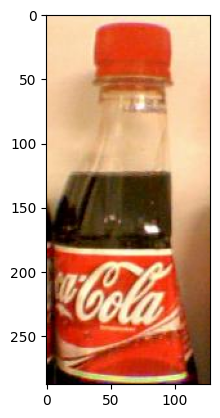

In [5]:
def mid_bottle(image): 
  # Define as coordenadas do retângulo de recorte (x, y, largura, altura)
  x = 110
  y = 0
  width = 133
  height = 300

  # Recorta a região da imagem
  bottle = image[y:y+height, x+5:x+width]
  return bottle

plt.imshow(mid_bottle(bottles[18]))

0


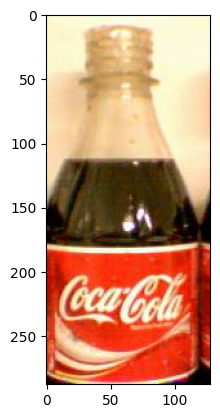

In [6]:
def none_bottle(image):
    # Calcule a cor média da imagem
    cor_media = cv2.mean(image)[:3]
    #print(cor_media)
    # Cor média quando não tem garrafa
    cor_fornecida = (224.52589129483815, 188.11871172353457, 153.8780894575678)

    # Limiar de diferença aceitável
    limiar = 11

    cor_media_arr = np.array(cor_media)
    cor_fornecida_arr = np.array(cor_fornecida)

    diferenca = np.abs(cor_media_arr - cor_fornecida_arr)
    #print(diferenca)
    if np.all(diferenca <= limiar):
        #Verificar se tem cor vermelha na imagem
        hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        lower_red = np.array([0, 100, 100])
        upper_red = np.array([10, 255, 255])
        mask = cv2.inRange(hsv, lower_red, upper_red)
        if cv2.countNonZero(mask) > 1000:
            return 0
        else:
            return 1

    else:
        return 0
img = mid_bottle(bottles[24])
plt.imshow(img)
print(none_bottle(img))

1


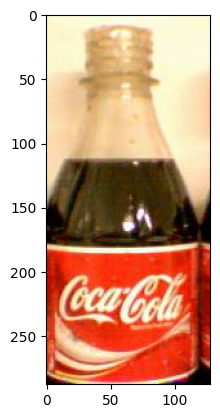

In [7]:
def none_cover(image):
    # Definindo as coordenadas da região da tampa
    x = 0
    y = 0
    width = 100
    height = 70

    # Recortando a região da tampa da garrafa
    cap_region = image[y:y+height, x:x+width]
    #plt.imshow(cap_region)

    # Convertendo a imagem para escala de cinza
    gray = cv2.cvtColor(cap_region, cv2.COLOR_RGB2GRAY)
    
    # Fazendo thresholding para destacar a cor vermelha
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    #plt.imshow(thresh, cmap='gray')
    
    total_pixels = np.prod(thresh.shape)
    black_pixels = np.sum(thresh == 0)
    black_percentage = (black_pixels / total_pixels) * 100
    #print(black_percentage)
    if black_percentage > 10:
        return 0
    else:
        return 1
  
img = mid_bottle(bottles[24])
plt.imshow(img)
print(none_cover(img))

0


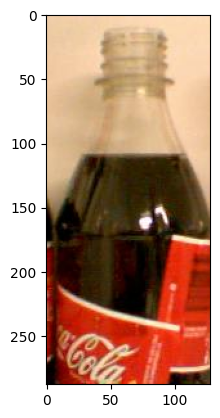

In [8]:
def none_label(image):
    # Definindo as coordenadas da região do rótulo
    x = 20
    y = 175
    width = 150
    height = 150

    # Recortando a região do rótulo
    label_region = image[y:y+height, x:x+width]

    # plt.imshow(label_region)

    # Segmentando com thresholding
    gray = cv2.cvtColor(label_region, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    #plt.imshow(thresh, cmap='gray')
    
    total_pixels = np.prod(thresh.shape)
    black_pixels = np.sum(thresh == 0)
    black_percentage = (black_pixels / total_pixels) * 100
    #print(black_percentage)
    if black_percentage > 85:
        return 1
    else:
        return 0

img = mid_bottle(bottles[48])
plt.imshow(img)
print(none_label(img))

1


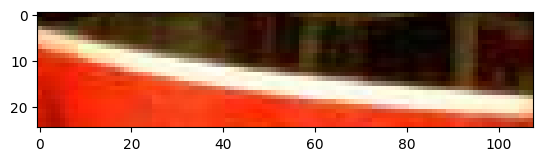

In [9]:
def label_mismatch(image):
    # Definindo as coordenadas da região do rótulo
    x = 20
    y = 175
    width = 150
    height = 25

    # Recortando a região do rótulo
    label_region = image[y:y+height, x:x+width]
    plt.imshow(label_region)
    # Convertendo a imagem para escala de cinza
    gray = cv2.cvtColor(label_region, cv2.COLOR_RGB2GRAY)
    # Obter o pixel médio 
    # Fazendo thresholding para destacar a cor preta
    _, thresh = cv2.threshold(gray, 100, 127, cv2.THRESH_BINARY)
    #plt.imshow(thresh, cmap='gray')
    
    total_pixels = np.prod(thresh.shape)
    gray_pixels = np.sum(thresh == 127)
    gray_percentage = (gray_pixels / total_pixels) * 100
    
    #print(gray_percentage)
    if gray_percentage > 45:
        return 0
    else:
        return 1
img = mid_bottle(bottles[21])
plt.imshow(img)
print(label_mismatch(img))

1

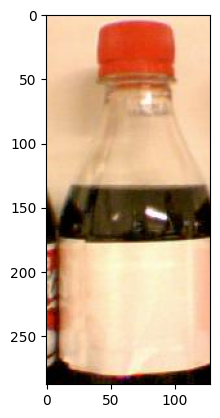

In [10]:
def none_label_white(image):
  # Definindo as coordenadas da região do rótulo
  x = 20
  y = 150
  width = 150
  height = 150

  # Recortando a região do rótulo
  label_region = image[y:y+height, x:x+width]
  #plt.imshow(label_region)
  
  gray_image = cv2.cvtColor(label_region, cv2.COLOR_RGB2GRAY)
  thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
  #plt.imshow(thresh)
  # Calculando a porcentagem de pixels brancos na imagem
  total_pixels = np.prod(thresh.shape)
  white_pixels = np.sum(thresh == 255)
  white_percentage = (white_pixels / total_pixels) * 100

  has_significant_white_area = white_percentage > 65

  if has_significant_white_area:
      return 1
  else:
      return 0

img = mid_bottle(bottles[3])
plt.imshow(img)
print(none_label_white(img))

0

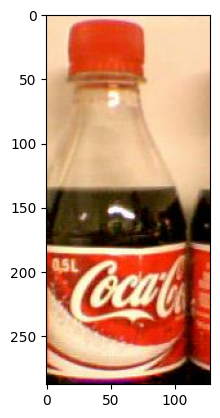

In [11]:
def high_content(image):
    x = 30
    y = 113
    width = 70
    height = 30

    content_region = image[y:y+height, x:x+width]
    #plt.imshow(content_region)

    gray_image = cv2.cvtColor(content_region, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
    #plt.imshow(thresh, cmap='gray')
    total_pixels = np.prod(thresh.shape)
    black_pixels = np.sum(thresh == 0)
    black_percentage = (black_pixels / total_pixels) * 100

    high_content = black_percentage > 65
    if high_content:
        return 1
    else:
        return 0
img = mid_bottle(bottles[1])
plt.imshow(img)
print(high_content(img))

In [12]:
def low_content(image):
    x = 30
    y = 120
    width = 70
    height = 30

    content_region = image[y:y+height, x:x+width]
    #plt.imshow(content_region)
    gray_image = cv2.cvtColor(content_region, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
    #plt.imshow(thresh, cmap='gray')
    # Calculando a porcentagem de pixels pretos na imagem
    total_pixels = np.prod(thresh.shape)
    black_pixels = np.sum(thresh == 0)
    black_percentage = (black_pixels / total_pixels) * 100
    #print(black_percentage)
    low_content = black_percentage < 10
    if low_content:
        return 1
    else:
        return 0
img = mid_bottle(bottles[62])
#plt.imshow(img)
print(low_content(img))

0


129


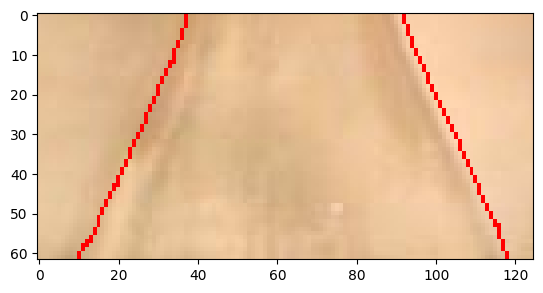

In [13]:
def bottle_area(image):
    x = 110
    y = 80
    width = 130
    height = 62
    bottle = image[y:y+height, x+5:x+width]
    #plt.imshow(bottle)
    gray = cv2.cvtColor(bottle, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
    #plt.imshow(thresh, cmap='gray')
    # Canny edge detection
    edges = cv2.Canny(thresh, 100, 200)
    #plt.imshow(edges, cmap='gray')
    # Calculando a área da garrafa
    area = np.sum(edges == 255)
    return bottle, edges, area

def draw_area(standard, image):
    standard, standard_edges, standard_area = bottle_area(standard)
    image,_, image_area = bottle_area(image)
    diff = standard_area - image_area
    print(diff)
    if diff == standard_area:
        # Desenhar contornos da garrafa padrão na garrafa de teste
        contours, _ = cv2.findContours(standard_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(image, contours, -1, (255, 0, 0), 1)
        plt.imshow(image)
    else:
        print('Área da garrafa diferente da padrão')
        

draw_area(bottles[0], bottles[4])



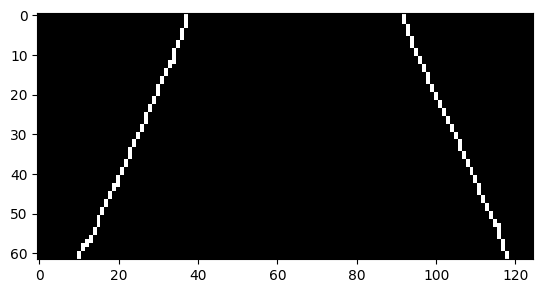

In [14]:
def transparency_detection(image):
    # obtendo apenas a parte superior da garrafa    
    x = 0
    y = 0
    width = 352  
    height = 170
    image = image[y:y+height, x:x+width]
    # Convertendo para YCrCb
    #ycrcb = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    #plt.imshow(ycrcb)
    # Separando os canais
    #y, cr, cb = cv2.split(ycrcb)
    #plt.imshow(y, cmap='gray')
    #plt.imshow(cr, cmap='gray')
   #plt.imshow(cb, cmap='gray')
   
   #Convertendo para hsv
    #hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    #plt.imshow(hsv)
    # Separando os canais
    #h, s, v = cv2.split(hsv)
    #plt.imshow(h, cmap='gray')
    #plt.imshow(s, cmap='gray')
    #plt.imshow(v, cmap='gray') # Interessante
    # Aplicando thresholding no canal V
    #_, thresh = cv2.threshold(v, 100, 255, cv2.THRESH_BINARY) # Detecta o nível da garrafa
    #plt.imshow(thresh, cmap='gray')
    
    # Cortando imagem para obtera garrafa do meio
    x = 110
    y = 80
    width = 130
    height = 62
    bottle = image[y:y+height, x+5:x+width]
    #plt.imshow(bottle, cmap='gray')
    # Thresholding para obter a garrafa
    gray = cv2.cvtColor(bottle, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
    #plt.imshow(thresh, cmap='gray')
    # Canny
    edges = cv2.Canny(thresh, 100, 200)
    plt.imshow(edges, cmap='gray')

img = bottles[0]
transparency_detection(img)

In [15]:
def bottle_smashed(image):
    x = 100
    y = 80
    width = 150
    height = 62
    img = image.copy()
    bottle = img[y:y+height, x+5:x+width]
    # Suavisando a imagem
    #bottle = cv2.GaussianBlur(bottle, (9, 9), 0)

    # Convertendo para hsv
    hsv = cv2.cvtColor(bottle, cv2.COLOR_RGB2HSV)
    _, _, v = cv2.split(hsv)

    # Aplicando thresholding no canal V
    _, thresh = cv2.threshold(v, 165, 255, cv2.THRESH_BINARY_INV)
    #plt.imshow(thresh, cmap='gray')
    # Detectando contornos
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #Aplicando bounding rect
    # for contour in contours:
    #     x, y, w, h = cv2.boundingRect(contour)
    #     cv2.rectangle(bottle, (x, y), (x+w, y+h), (255, 0, 0), 1)
    # Obtendo a área do maior retângulo
    areas = [cv2.contourArea(contour) for contour in contours]
    if len(areas) == 0:
        #plt.imshow(bottle)
        return 0
    max_area = max(areas)
    max_area_index = areas.index(max_area)
    x, y, w, h = cv2.boundingRect(contours[max_area_index])
    cv2.rectangle(bottle, (x, y), (x+w, y+h), (0, 255, 0), 1)
    # Cortando a imagem para que exiba apenas a garrafa com maior retangulo
    cut_bottle = thresh[y:y+h, x:x+w]
    #plt.imshow(cut_bottle, cmap='gray')
    # Largura da imagem
    width = cut_bottle.shape[1]
    # return width
    if width < 100:
        return 1
    else:
        # Verificar se o contorno de cut_bottle faz uma curva
        # Aplicando Canny
        edges = cv2.Canny(cut_bottle, 100, 180)
        # Identificando o ponto máximo do contorno na primeira metade da imagem
        half_width = width // 2
        left_half = edges[:, :half_width]
        left_max = np.argmax(left_half)
        left_max_x = left_max % half_width
        left_max_y = left_max // half_width
        # Cortando a imagem a partir do ponto máximo
        cut_left = edges[:, left_max_x:]
        # Refletindo a imagem
        cut_left = cv2.flip(cut_left, 1)
        # Identificando o ponto máximo da imagem cortada cut_left
        right_max = np.argmax(cut_left)
        right_max_x = right_max % half_width
        right_max_y = right_max // half_width
        # Cortando a imagem a partir do ponto máximo
        cut_right = cut_left[:, right_max_x:]
        # Traçando uma reta branca horizontal a partir do ponto máximo
        cut_right[right_max_y, :] = 255
        #Cortando um pixel na esquerda
        cut_right = cut_right[:, 1:]
        #Cortando um pixel na direita
        cut_right = cut_right[:, :-1]
        #plt.imshow(cut_right, cmap='gray')
        # Se dessa reta houver pixels brancos a 3 pixels de altura, a garrafa está quebrada
        if 255 in cut_right[right_max_y+3, :]:
            # COntar o número de pixels dessa altura
            white_pixels = np.sum(cut_right[right_max_y+3, :] == 255)
            if white_pixels > 9:
                return 1
            else:
                return 0
        else:
            return 0
        
        
    
img = bottles[0]
print(bottle_smashed(img))


0


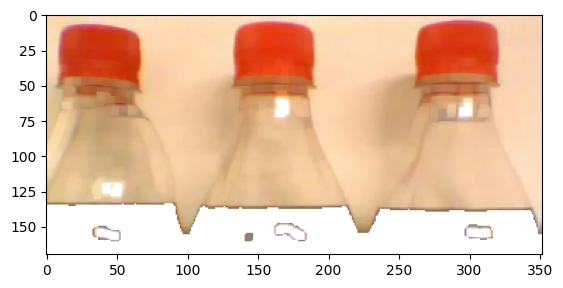

In [16]:
def middle_contours(image):
    # obtendo apenas a parte superior da garrafa
    x = 0
    y = 0
    width = 352  
    height = 170
    image = image[y:y+height, x:x+width]
    #plt.imshow(image)
    # Erodindo a imagem para melhorar a detecção de contornos
    kernel = np.ones((3, 3), np.uint8)
    eroded = cv2.erode(image, kernel, iterations=1)
    #plt.imshow(eroded)
    # Dilatando a imagem para melhorar a detecção de contornos
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(eroded, kernel, iterations=1)
    #plt.imshow(dilated)
    # Removendo reflexos brancos na imagem
    gray = cv2.cvtColor(dilated, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray, 235, 255, cv2.THRESH_BINARY)
    #plt.imshow(thresh, cmap='gray')
    # Aplicando remoção
    dilated[thresh == 255] = 255
    #plt.imshow(dilated)
    
    # Removendo a cor do líquido da cocacola
    hsv = cv2.cvtColor(dilated, cv2.COLOR_RGB2HSV)
    #plt.imshow(hsv)
    # Remover a cor preta correspondente no canal hsv
    lower_black = np.array([0, 0, 0])
    upper_black = np.array([180, 255, 135])
    mask = cv2.inRange(hsv, lower_black, upper_black)
    #plt.imshow(mask, cmap='gray')
    # Aplicando remoção
    dilated[mask == 255] = 255
    plt.imshow(dilated)
img = bottles[1]
middle_contours(img)

In [17]:
def classify_bottle(bottle, image_dict, bottles):
    if none_bottle(bottle):
        image_dict['BOTTLE_NONE'] = 1
    else:
        if none_cover(bottle):
            image_dict['COVER_NONE'] = 1
    
        if none_label(bottle):
            image_dict['LABEL_NONE'] = 1
        else:
            if none_label_white(bottle):
                image_dict['LABEL_WHITE'] = 1
            else:
                if label_mismatch(bottle):
                    image_dict['LABEL_MISPLACED'] = 1
            
        if not low_content(bottle):
            if bottle_smashed(bottles):
                image_dict['BOTTLE_SMASHED'] = 1
        if high_content(bottle):
            image_dict['CONTENT_HIGH'] = 1
        elif low_content(bottle):
            image_dict['CONTENT_LOW'] = 1
    
    return image_dict


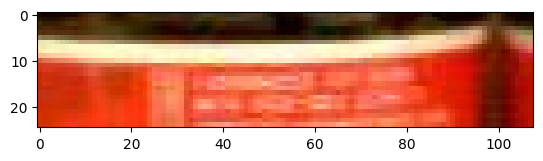

In [18]:
for i, image_dict in enumerate(image_dicts):
    # Obter a imagem correspondente ao dicionário
    image = bottles[i]  # Obter a imagem
    img = mid_bottle(image)
    # Classificar a imagem
    image_dict = classify_bottle(img, image_dict, image)

In [19]:
import csv

# Juntar todos os dicionários em uma lista
all_dicts = image_dicts

# Obter todas as chaves presentes em todos os dicionários, a ordem das chaves deve ser a mesma do dict
all_keys = list(all_dicts[0].keys())
# Nome do arquivo CSV
csv_filename = 'imagens.csv'

# Adicionar a chave 'id' ao início da lista
all_keys.insert(0, 'id')
# print(all_keys)

# Abrir o arquivo CSV em modo de escrita
with open(csv_filename, 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=all_keys)

    # Escrever o cabeçalho do CSV
    writer.writeheader()

    # Escrever cada dicionário como uma linha no CSV
    for i, image_dict in enumerate(all_dicts):
        image_dict['id'] = f"test_{i+1}.jpg"  # Adicionar o nome da imagem
        writer.writerow(image_dict)

